In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 1.2MB 16.8MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 204kB 34.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# A Language Model from Scratch

## The Data

In [3]:
from fastai.text.all import *
path = untar_data(URLs.HUMAN_NUMBERS)

In [4]:
path

Path('/root/.fastai/data/human_numbers')

In [5]:
#hide
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('valid.txt'),Path('train.txt')]

In [7]:
with open(path/'train.txt') as f: text =f.readlines()

In [8]:
L(text)

(#7999) ['one \n','two \n','three \n','four \n','five \n','six \n','seven \n','eight \n','nine \n','ten \n'...]

In [9]:
with open(path/'valid.txt') as f: text += f.readlines()

In [10]:
L(text)

(#9998) ['one \n','two \n','three \n','four \n','five \n','six \n','seven \n','eight \n','nine \n','ten \n'...]

In [11]:
text = L(text)

In [12]:
text[:10]

(#10) ['one \n','two \n','three \n','four \n','five \n','six \n','seven \n','eight \n','nine \n','ten \n']

Remove the \ns and seperate by dots

In [13]:
' . '.join([w.strip() for w in text])

'one . two . three . four . five . six . seven . eight . nine . ten . eleven . twelve . thirteen . fourteen . fifteen . sixteen . seventeen . eighteen . nineteen . twenty . twenty one . twenty two . twenty three . twenty four . twenty five . twenty six . twenty seven . twenty eight . twenty nine . thirty . thirty one . thirty two . thirty three . thirty four . thirty five . thirty six . thirty seven . thirty eight . thirty nine . forty . forty one . forty two . forty three . forty four . forty five . forty six . forty seven . forty eight . forty nine . fifty . fifty one . fifty two . fifty three . fifty four . fifty five . fifty six . fifty seven . fifty eight . fifty nine . sixty . sixty one . sixty two . sixty three . sixty four . sixty five . sixty six . sixty seven . sixty eight . sixty nine . seventy . seventy one . seventy two . seventy three . seventy four . seventy five . seventy six . seventy seven . seventy eight . seventy nine . eighty . eighty one . eighty two . eighty thre

In [14]:
text = ' . '.join([w.strip() for w in text])

In [15]:
text

'one . two . three . four . five . six . seven . eight . nine . ten . eleven . twelve . thirteen . fourteen . fifteen . sixteen . seventeen . eighteen . nineteen . twenty . twenty one . twenty two . twenty three . twenty four . twenty five . twenty six . twenty seven . twenty eight . twenty nine . thirty . thirty one . thirty two . thirty three . thirty four . thirty five . thirty six . thirty seven . thirty eight . thirty nine . forty . forty one . forty two . forty three . forty four . forty five . forty six . forty seven . forty eight . forty nine . fifty . fifty one . fifty two . fifty three . fifty four . fifty five . fifty six . fifty seven . fifty eight . fifty nine . sixty . sixty one . sixty two . sixty three . sixty four . sixty five . sixty six . sixty seven . sixty eight . sixty nine . seventy . seventy one . seventy two . seventy three . seventy four . seventy five . seventy six . seventy seven . seventy eight . seventy nine . eighty . eighty one . eighty two . eighty thre

In [16]:
tokens = text.split(' ')

In [17]:
tokens[:5]

['one', '.', 'two', '.', 'three']

Vocab is now the unique words in them.

In [18]:
L(tokens).unique()

(#30) ['one','.','two','three','four','five','six','seven','eight','nine'...]

In [19]:
vocab = L(tokens).unique()

In [20]:
vocab

(#30) ['one','.','two','three','four','five','six','seven','eight','nine'...]

Assign numbers for each word in vocab

In [21]:
{word: num for num,word in enumerate(vocab)}

{'.': 1,
 'eight': 8,
 'eighteen': 18,
 'eighty': 26,
 'eleven': 11,
 'fifteen': 15,
 'fifty': 23,
 'five': 5,
 'forty': 22,
 'four': 4,
 'fourteen': 14,
 'hundred': 28,
 'nine': 9,
 'nineteen': 19,
 'ninety': 27,
 'one': 0,
 'seven': 7,
 'seventeen': 17,
 'seventy': 25,
 'six': 6,
 'sixteen': 16,
 'sixty': 24,
 'ten': 10,
 'thirteen': 13,
 'thirty': 21,
 'thousand': 29,
 'three': 3,
 'twelve': 12,
 'twenty': 20,
 'two': 2}

In [22]:
word2idx = {word: num for num,word in enumerate(vocab)}

Fastai way to do it.

In [23]:
val2idx(vocab) 

{'.': 1,
 'eight': 8,
 'eighteen': 18,
 'eighty': 26,
 'eleven': 11,
 'fifteen': 15,
 'fifty': 23,
 'five': 5,
 'forty': 22,
 'four': 4,
 'fourteen': 14,
 'hundred': 28,
 'nine': 9,
 'nineteen': 19,
 'ninety': 27,
 'one': 0,
 'seven': 7,
 'seventeen': 17,
 'seventy': 25,
 'six': 6,
 'sixteen': 16,
 'sixty': 24,
 'ten': 10,
 'thirteen': 13,
 'thirty': 21,
 'thousand': 29,
 'three': 3,
 'twelve': 12,
 'twenty': 20,
 'two': 2}

Numericalize the words in tokens.

In [24]:
word2idx['.']

1

In [25]:
num_tokens = L([word2idx[word] for word in tokens])

In [26]:
num_tokens[:10]

(#10) [0,1,2,1,3,1,4,1,5,1]

## Our First Language Model from Scratch

Make a tuple of (x,y). This is now a dataset.

In [27]:
L((tokens[i:i+3], tokens[i+3]) for i in range(0,len(tokens)-4,3)) #tokens[i+3] is the pred

(#21031) [(['one', '.', 'two'], '.'),(['.', 'three', '.'], 'four'),(['four', '.', 'five'], '.'),(['.', 'six', '.'], 'seven'),(['seven', '.', 'eight'], '.'),(['.', 'nine', '.'], 'ten'),(['ten', '.', 'eleven'], '.'),(['.', 'twelve', '.'], 'thirteen'),(['thirteen', '.', 'fourteen'], '.'),(['.', 'fifteen', '.'], 'sixteen')...]

In [28]:
seqs = L((tensor(num_tokens[i:i+3]), num_tokens[i+3]) for i in range(0,len(num_tokens)-4,3))
seqs

(#21031) [(tensor([0, 1, 2]), 1),(tensor([1, 3, 1]), 4),(tensor([4, 1, 5]), 1),(tensor([1, 6, 1]), 7),(tensor([7, 1, 8]), 1),(tensor([1, 9, 1]), 10),(tensor([10,  1, 11]), 1),(tensor([ 1, 12,  1]), 13),(tensor([13,  1, 14]), 1),(tensor([ 1, 15,  1]), 16)...]

In [29]:
bs = 200
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(seqs[:cut], seqs[cut:], bs=bs, shuffle=False)

In [30]:
dls.train_ds

(#16824) [(tensor([0, 1, 2]), 1),(tensor([1, 3, 1]), 4),(tensor([4, 1, 5]), 1),(tensor([1, 6, 1]), 7),(tensor([7, 1, 8]), 1),(tensor([1, 9, 1]), 10),(tensor([10,  1, 11]), 1),(tensor([ 1, 12,  1]), 13),(tensor([13,  1, 14]), 1),(tensor([ 1, 15,  1]), 16)...]

In [31]:
dls.valid_ds

(#4207) [(tensor([ 1,  8, 29]), 26),(tensor([26,  5,  1]), 8),(tensor([ 8, 29, 26]), 6),(tensor([6, 1, 8]), 29),(tensor([29, 26,  7]), 1),(tensor([ 1,  8, 29]), 26),(tensor([26,  8,  1]), 8),(tensor([ 8, 29, 26]), 9),(tensor([9, 1, 8]), 29),(tensor([29, 27,  1]), 8)...]

Checking one batch

In [32]:
dls.one_batch()[0].shape

torch.Size([200, 3])

In [33]:
dls.one_batch()[1].shape

torch.Size([200])

In [34]:
x = dls.one_batch()[0]

First words

In [35]:
x[:,0]

tensor([ 0,  1,  4,  1,  7,  1, 10,  1, 13,  1, 16,  1, 19,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,  0,  2,  3,  4,  5,  6,  7,  8,  9,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25,  0,  2,  3,  4,  5,  6,  7,  8,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 27, 27, 27, 27, 27, 27, 27, 27, 27,  0,  0,  1,  2, 28,  0,
         1,  5, 28,  0,  1,  8, 28,  0,  1, 11, 28,  0,  1, 14, 28,  0,  1, 17, 28,  0,  1, 20, 28,  1, 20,  0,  3, 28,  1, 20,  0,  6, 28,  1, 20,  0,  9, 28,  0,  0, 28,  1, 21,  0,  4, 28,  1, 21,
         0,  7, 28,  1, 21,  0,  1, 22,  0,  2, 28,  1, 22,  0,  5, 28,  1, 22,  0,  8, 28,  1, 23, 28,  1, 23,  0,  3, 28,  1, 23,  0,  6, 28,  1, 23,  0,  9, 28,  0,  0, 28,  1, 24,  0,  4, 28,  1,
        24,  0,  7, 28,  1, 24,  0,  1])

### Our Language Model in PyTorch

Relu sets all -ve to 0s

In [36]:
F.relu(tensor([-1,1,0,2]))

tensor([0, 1, 0, 2])

In [37]:
R = F.relu

In [38]:
class LMModel1(Module):
    def __init__(self, vocab_sz, hidden_sz):
        self.vocab_sz = vocab_sz
        self.hidden_sz = hidden_sz
        self.i_h = nn.Embedding(self.vocab_sz,self.hidden_sz) # embeddings layer
        self.h_h = nn.Linear(self.hidden_sz,self.hidden_sz) # a hidden layer
        self.h_o = nn.Linear(self.hidden_sz,self.vocab_sz) 
        # output activations of same size since we return weights for each word in vocab
        #pass
    def forward(self, x): # receives data
        # init h
        """
        we add the activations from the prev layer cos we want the model to read it 
        continuously, one after the other.
        """
        h = self.i_h(x[:,0]) # first layer is embeddings of word 1
        h = R(self.h_h(h)) # relu of hidden layer activations
        h += self.i_h(x[:,1]) # first layer is embeddings word 2 + acts of w1
        h = R(self.h_h(h)) # relu of hidden layer acts
        h += self.i_h(x[:,2]) # first layer is embeddings word 3 + acts of w2
        h = R(self.h_h(h)) # relu of hidden activations
        return self.h_o(h)

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.02290867641568184)

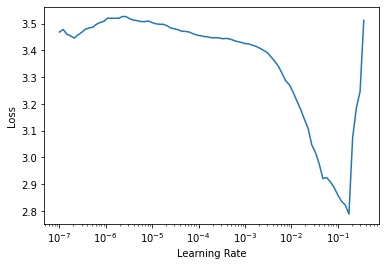

In [39]:
model = LMModel1(len(vocab), hidden_sz=64)
learn = Learner(dls, model, loss_func=F.cross_entropy, 
                metrics=accuracy)
learn.lr_find()

In [40]:
learn.fit_one_cycle(4, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.750731,2.056222,0.436891,00:01
1,1.669985,1.597114,0.455431,00:01
2,1.671458,1.500680,0.453768,00:01
3,1.510293,1.796512,0.341098,00:01


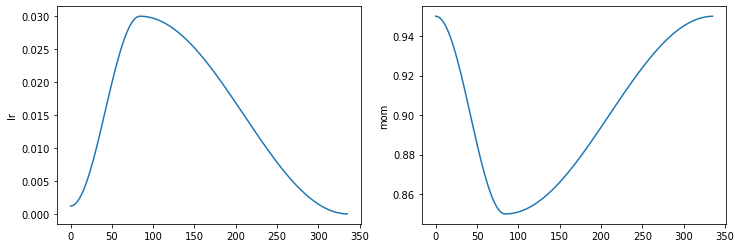

In [41]:
learn.recorder.plot_sched()

In [42]:
model.state_dict()['h_o.weight'].sum(axis=-1).sigmoid() # output activations

tensor([2.6402e-03, 8.6709e-01, 1.5576e-02, 1.0164e-02, 1.1365e-01, 3.6239e-02, 3.1426e-02, 7.7395e-03, 8.0424e-04, 7.2073e-04, 2.6974e-07, 3.9848e-07, 3.3161e-08, 4.5603e-08, 2.3143e-07, 2.5075e-08,
        6.9314e-08, 2.6294e-07, 6.2277e-08, 4.8068e-08, 1.2277e-05, 1.3619e-05, 1.2161e-05, 9.1393e-06, 2.3180e-05, 3.6902e-05, 1.3461e-05, 3.9241e-05, 1.5372e-02, 2.0713e-03])

## Pass idx to get the pred

The numericalized vocabs for test

In [43]:
test_sentence = 'one hundred thirty five'

encode with dots.

In [44]:
test_sentence.replace(' ',' . ')

'one . hundred . thirty . five'

In [45]:
test_sentence = test_sentence.replace(' ',' . ')

In [46]:
test_sentence.split(' ')

['one', '.', 'hundred', '.', 'thirty', '.', 'five']

In [47]:
x = test_sentence.split(' ')
x

['one', '.', 'hundred', '.', 'thirty', '.', 'five']

numericalize this

In [48]:
[word2idx[w] for w in x]

[0, 1, 28, 1, 21, 1, 5]

In [49]:
num_x = [word2idx[w] for w in x]

In [50]:
num_x3 = num_x[:3]
num_x3, num_x[3]

([0, 1, 28], 1)

In [51]:
num_predict = tensor([num_x3]) # preds should be 26 and 8
num_predict

tensor([[ 0,  1, 28]])

Returning a tuple of 3. 

In [52]:
preds = learn.predict(num_predict)

In [53]:
preds

(tensor([-1.3635, -0.6555, -1.0344, -1.4928, -1.6826, -0.7246, -1.0766, -1.5345, -1.0705, -1.4378, -1.3726, -0.9991, -1.4251, -1.4216, -1.0074, -1.3738, -1.3745, -1.0591, -1.4470, -1.4309,  0.6053,
          0.6656,  0.6240,  0.5871,  0.6782,  0.6476,  0.6965,  0.7473, -2.8850, -4.7045]),
 tensor([-1.3635, -0.6555, -1.0344, -1.4928, -1.6826, -0.7246, -1.0766, -1.5345, -1.0705, -1.4378, -1.3726, -0.9991, -1.4251, -1.4216, -1.0074, -1.3738, -1.3745, -1.0591, -1.4470, -1.4309,  0.6053,
          0.6656,  0.6240,  0.5871,  0.6782,  0.6476,  0.6965,  0.7473, -2.8850, -4.7045]),
 tensor([-1.3635, -0.6555, -1.0344, -1.4928, -1.6826, -0.7246, -1.0766, -1.5345, -1.0705, -1.4378, -1.3726, -0.9991, -1.4251, -1.4216, -1.0074, -1.3738, -1.3745, -1.0591, -1.4470, -1.4309,  0.6053,
          0.6656,  0.6240,  0.5871,  0.6782,  0.6476,  0.6965,  0.7473, -2.8850, -4.7045]))

In [54]:
preds[0].argmax()

tensor(27)

In [55]:
preds[1].argmax()

tensor(27)

In [56]:
preds[2].argmax()

tensor(27)

In [57]:
vocab[26]

'eighty'

It predicted thousand, cos it has the most repetitions in the tokens

Which word has the max probability from the vocab.

In [58]:
n,counts = 0,torch.zeros(len(vocab))
for x,y in dls.valid:
    n += y.shape[0]
    for i in range_of(vocab): counts[i] += (y==i).long().sum()
idx = torch.argmax(counts)
idx, vocab[idx.item()], counts[idx].item()/n

(tensor(29), 'thousand', 0.15165200855716662)

Function to predict.

In [59]:
def predict_next_word_M1(sentence,learn):
    sentence = sentence.replace(' ',' . ')
    x = sentence.split(' ')
    num_x = [word2idx[w] for w in x]
    num_x3 = num_x[:3]
    target = num_x[3]
    num_predict = tensor([num_x3])
    preds = learn.predict(num_predict)
    idx= [preds[i].argmax() for i in range(len(preds))]
    return vocab[idx]
    

In [60]:
predict_next_word_M1('one hundred thirty five', learn)

(#3) ['ninety','ninety','ninety']

### Our First Recurrent Neural Network

In [61]:
class LMModel2(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        
    def forward(self, x):
        h = 0
        for i in range(3):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
        return self.h_o(h)

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.02290867641568184)

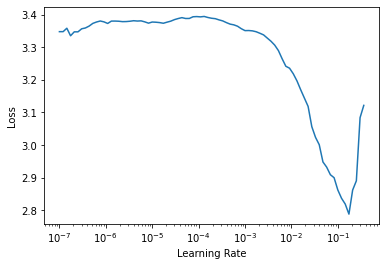

In [62]:
learn = Learner(dls, LMModel2(len(vocab), 64), loss_func=F.cross_entropy, 
                metrics=accuracy)
learn.lr_find()

In [63]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.933432,1.802919,0.473259,00:01
1,1.576522,1.487266,0.488709,00:01
2,1.475186,1.441476,0.506299,00:01
3,1.524372,1.538215,0.393154,00:01


In [64]:
predict_next_word_M1('one hundred thirty five', learn)

(#3) ['eighty','eighty','eighty']

## LMM2 for upto 11 words. predict 12th

In [65]:
sequence_len = 11

In [66]:
i=4

In [67]:
x = tokens[i:i+sequence_len]
x

['three', '.', 'four', '.', 'five', '.', 'six', '.', 'seven', '.', 'eight']

In [68]:
y = tokens[i+sequence_len] # predict the 11th
y

'.'

In [69]:
x,y

(['three', '.', 'four', '.', 'five', '.', 'six', '.', 'seven', '.', 'eight'],
 '.')

Convert this to numericalized tokens. But avoid overlap!

In [70]:
i=2
x = tokens[sequence_len*i:(sequence_len*i)+sequence_len]
x

['twelve',
 '.',
 'thirteen',
 '.',
 'fourteen',
 '.',
 'fifteen',
 '.',
 'sixteen',
 '.',
 'seventeen']

In [71]:
y = tokens[(sequence_len*i)+sequence_len] # predict the 11th
y

'.'

Numricalized tensors

In [72]:
i=2
sequence_len = 11
x = tensor(num_tokens[sequence_len*i:(sequence_len*i)+sequence_len])
y = num_tokens[(sequence_len*i)+sequence_len]

In [73]:
x, y

(tensor([12,  1, 13,  1, 14,  1, 15,  1, 16,  1, 17]), 1)

Loop through the full doucument  to make lists of tensors.

In [74]:
max_rn = int(len(num_tokens)/sequence_len)
max_rn

5735

In [75]:
seqs = L([(tensor(num_tokens[sequence_len*i:(sequence_len*i)+sequence_len]), num_tokens[(sequence_len*i)+sequence_len]) for i in range(max_rn)])

In [76]:
seqs

(#5735) [(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6]), 1),(tensor([ 1,  7,  1,  8,  1,  9,  1, 10,  1, 11,  1]), 12),(tensor([12,  1, 13,  1, 14,  1, 15,  1, 16,  1, 17]), 1),(tensor([ 1, 18,  1, 19,  1, 20,  1, 20,  0,  1, 20]), 2),(tensor([ 2,  1, 20,  3,  1, 20,  4,  1, 20,  5,  1]), 20),(tensor([20,  6,  1, 20,  7,  1, 20,  8,  1, 20,  9]), 1),(tensor([ 1, 21,  1, 21,  0,  1, 21,  2,  1, 21,  3]), 1),(tensor([ 1, 21,  4,  1, 21,  5,  1, 21,  6,  1, 21]), 7),(tensor([ 7,  1, 21,  8,  1, 21,  9,  1, 22,  1, 22]), 0),(tensor([ 0,  1, 22,  2,  1, 22,  3,  1, 22,  4,  1]), 22)...]

In [77]:
[vocab[i] for i in seqs[-1][0].tolist()]

['.',
 'nine',
 'thousand',
 'nine',
 'hundred',
 'ninety',
 'seven',
 '.',
 'nine',
 'thousand',
 'nine']

In [78]:
len(num_tokens)/5

12619.0

In [79]:
def make_seq(item_list, sequence_len = 3, return_func = tensor):
    max_rn = int((len(item_list)-1)/sequence_len)
    seqs = L([(return_func(item_list[sequence_len*i:(sequence_len*i)+sequence_len]), item_list[(sequence_len*i)+sequence_len]) for i in range(max_rn)])
    return seqs

In [80]:
seqs = make_seq(num_tokens, 11)
bs = 100
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(seqs[:cut], seqs[cut:], bs=bs, shuffle=False)

In [81]:
def predict_next_word_M2(sentence,learn):
    sentence = sentence.replace(' ',' . ')
    x = sentence.split(' ')
    len_x = len(x)
    num_x = [word2idx[w] for w in x]
    num_x_lim = num_x[:len_x]
    #target = num_x[len_x]
    num_predict = tensor([num_x_lim])
    preds = learn.predict(num_predict)
    idx= [preds[i].argmax() for i in range(len(preds))]
    return vocab[idx]    

In [82]:
class LMModel2_mod(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        
    def forward(self, x):
        h = 0
        #print(x.shape)
        len_x = x.shape[1]
        for i in range(len_x):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
        return self.h_o(h)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.033113110810518265)

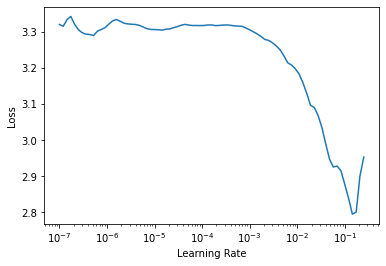

In [83]:
learn = Learner(dls, LMModel2_mod(len(vocab), 64), loss_func=F.cross_entropy, 
                metrics=accuracy)
learn.lr_find()

In [84]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.342731,2.053506,0.442895,00:00
1,1.862771,1.759127,0.492589,00:00
2,1.739125,1.602323,0.488230,00:00
3,1.573078,1.639864,0.471665,00:00


In [85]:
def predict_next_word_M2(sentence,learn):
    sentence = sentence.replace(' ',' . ')
    x = sentence.split(' ')
    len_x = len(x)
    num_x = [word2idx[w] for w in x]
    num_x_lim = num_x[:len_x]
    #target = num_x[len_x]
    num_predict = tensor([num_x_lim])
    preds = learn.predict(num_predict)
    idx= [preds[i].argmax() for i in range(len(preds))]
    return vocab[idx]    

In [86]:
sentence = 'twenty one thousand nine hundred twenty'
sentence = sentence.replace(' ',' . ')
x = sentence.split(' ')
len_x = len(x)
num_x = [word2idx[w] for w in x]
num_x_lim = num_x[:len_x]
num_predict = tensor([num_x_lim])
num_predict

tensor([[20,  1,  0,  1, 29,  1,  9,  1, 28,  1, 20]])

In [87]:
preds = learn.predict(num_predict)
idx= [preds[i].argmax() for i in range(len(preds))]
vocab[idx] 

(#3) ['six','six','six']

In [88]:
num_x

[20, 1, 0, 1, 29, 1, 9, 1, 28, 1, 20]

In [ ]:
# preds = learn.predict(num_predict)

In [89]:
predict_next_word_M2('twenty one thousand nine hundred twenty', learn)

(#3) ['six','six','six']

Will always predict thosusand. since thats the most common word.

## Improving the RNN

### Maintaining the State of an RNN

In [90]:
class LMModel3(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        self.h = 0 # so that the activations are not forgotten in each forward pass of batch.
        
    def forward(self, x):
        for i in range(3):
            self.h += self.i_h(x[:,i])
            self.h = R(self.h_h(self.h))
        out = self.h_o(self.h)
        self.h = self.h.detach()
        return out
    
    def reset(self): self.h = 0

To use the above model, we have to make the text flow. as streams in p340. so setup chunks of data

In [91]:
seqs = make_seq(tokens, sequence_len=10, return_func = L) # of length 3, predict the 4th
seqs

(#6309) [(['one', '.', 'two', '.', 'three', '.', 'four', '.', 'five', '.'], 'six'),(['six', '.', 'seven', '.', 'eight', '.', 'nine', '.', 'ten', '.'], 'eleven'),(['eleven', '.', 'twelve', '.', 'thirteen', '.', 'fourteen', '.', 'fifteen', '.'], 'sixteen'),(['sixteen', '.', 'seventeen', '.', 'eighteen', '.', 'nineteen', '.', 'twenty', '.'], 'twenty'),(['twenty', 'one', '.', 'twenty', 'two', '.', 'twenty', 'three', '.', 'twenty'], 'four'),(['four', '.', 'twenty', 'five', '.', 'twenty', 'six', '.', 'twenty', 'seven'], '.'),(['.', 'twenty', 'eight', '.', 'twenty', 'nine', '.', 'thirty', '.', 'thirty'], 'one'),(['one', '.', 'thirty', 'two', '.', 'thirty', 'three', '.', 'thirty', 'four'], '.'),(['.', 'thirty', 'five', '.', 'thirty', 'six', '.', 'thirty', 'seven', '.'], 'thirty'),(['thirty', 'eight', '.', 'thirty', 'nine', '.', 'forty', '.', 'forty', 'one'], '.')...]

In [92]:
len(seqs)

6309

bs sets the no of rows in a batch passed to model.

seq is the total len of the file.

seq/bs will give the no of items in each batch

In [93]:
len_each_batch = len(seqs)//bs
len_each_batch # items in each batch

63

First row of this sequence would be `seqs[0], seq[len_each_batch], seq[2*len_each_batch], ..`

In [94]:
seqs[0], seqs[len_each_batch], seqs[63*len_each_batch]

(((#10) ['one','.','two','.','three','.','four','.','five','.'], 'six'),
 ((#10) ['seventy','seven','.','one','hundred','seventy','eight','.','one','hundred'],
  'seventy'),
 ((#10) ['thousand','four','hundred','twenty','four','.','six','thousand','four','hundred'],
  'twenty'))

In [95]:
# [seqs[i*len_each_batch] for i in range(0,bs)] # first batch

In [96]:
seqs[1], seqs[2*len_each_batch], seqs[(63+1)*len_each_batch]

(((#10) ['six','.','seven','.','eight','.','nine','.','ten','.'], 'eleven'),
 ((#10) ['hundred','twelve','.','three','hundred','thirteen','.','three','hundred','fourteen'],
  '.'),
 ((#10) ['.','six','thousand','five','hundred','eighteen','.','six','thousand','five'],
  'hundred'))

See notes.

The range of i is from 0 to bs-1

Range of j from 0 to m-1

formula for selecting the seq would be `(bs-1) * m + (m-1)`

In [97]:
reindexed = L()
for j in range(0,len_each_batch):
    reindexed += [seqs[i*len_each_batch +j] for i in range(0,bs)]

In [99]:
reindexed

(#6300) [(['one', '.', 'two', '.', 'three', '.', 'four', '.', 'five', '.'], 'six'),(['seventy', 'seven', '.', 'one', 'hundred', 'seventy', 'eight', '.', 'one', 'hundred'], 'seventy'),(['hundred', 'twelve', '.', 'three', 'hundred', 'thirteen', '.', 'three', 'hundred', 'fourteen'], '.'),(['hundred', 'forty', 'six', '.', 'four', 'hundred', 'forty', 'seven', '.', 'four'], 'hundred'),(['eight', '.', 'five', 'hundred', 'seventy', 'nine', '.', 'five', 'hundred', 'eighty'], '.'),(['.', 'seven', 'hundred', 'fourteen', '.', 'seven', 'hundred', 'fifteen', '.', 'seven'], 'hundred'),(['forty', 'seven', '.', 'eight', 'hundred', 'forty', 'eight', '.', 'eight', 'hundred'], 'forty'),(['.', 'nine', 'hundred', 'eighty', '.', 'nine', 'hundred', 'eighty', 'one', '.'], 'nine'),(['thousand', 'one', 'hundred', 'ten', '.', 'one', 'thousand', 'one', 'hundred', 'eleven'], '.'),(['two', 'hundred', 'three', '.', 'one', 'thousand', 'two', 'hundred', 'four', '.'], 'one')...]

In [100]:
reindexed[1]

((#10) ['seventy','seven','.','one','hundred','seventy','eight','.','one','hundred'],
 'seventy')

In [101]:
reindexed[2]

((#10) ['hundred','twelve','.','three','hundred','thirteen','.','three','hundred','fourteen'],
 '.')

Do this for the actual numericalized one.

In [102]:
seqs = make_seq(num_tokens, sequence_len=10, return_func = tensor) # of length 3, predict the 4th
seqs

(#6309) [(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1]), 6),(tensor([ 6,  1,  7,  1,  8,  1,  9,  1, 10,  1]), 11),(tensor([11,  1, 12,  1, 13,  1, 14,  1, 15,  1]), 16),(tensor([16,  1, 17,  1, 18,  1, 19,  1, 20,  1]), 20),(tensor([20,  0,  1, 20,  2,  1, 20,  3,  1, 20]), 4),(tensor([ 4,  1, 20,  5,  1, 20,  6,  1, 20,  7]), 1),(tensor([ 1, 20,  8,  1, 20,  9,  1, 21,  1, 21]), 0),(tensor([ 0,  1, 21,  2,  1, 21,  3,  1, 21,  4]), 1),(tensor([ 1, 21,  5,  1, 21,  6,  1, 21,  7,  1]), 21),(tensor([21,  8,  1, 21,  9,  1, 22,  1, 22,  0]), 1)...]

In [103]:
reindexed = L()
for j in range(0,len_each_batch):
    reindexed += [seqs[i*len_each_batch +j] for i in range(0,bs)]

In [104]:
reindexed

(#6300) [(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1]), 6),(tensor([25,  7,  1,  0, 28, 25,  8,  1,  0, 28]), 25),(tensor([28, 12,  1,  3, 28, 13,  1,  3, 28, 14]), 1),(tensor([28, 22,  6,  1,  4, 28, 22,  7,  1,  4]), 28),(tensor([ 8,  1,  5, 28, 25,  9,  1,  5, 28, 26]), 1),(tensor([ 1,  7, 28, 14,  1,  7, 28, 15,  1,  7]), 28),(tensor([22,  7,  1,  8, 28, 22,  8,  1,  8, 28]), 22),(tensor([ 1,  9, 28, 26,  1,  9, 28, 26,  0,  1]), 9),(tensor([29,  0, 28, 10,  1,  0, 29,  0, 28, 11]), 1),(tensor([ 2, 28,  3,  1,  0, 29,  2, 28,  4,  1]), 0)...]

In [105]:
def group_chunks(ds, bs):
    m = len(ds) // bs
    new_ds = L()
    for i in range(m): new_ds += L(ds[i + m*j] for j in range(bs))
    return new_ds

In [106]:
def group_chunks_mod(ds, bs):
    len_each_batch = len(ds)// bs
    # len_each_batch # items in each batch
    reindexed = L()
    for j in range(0,len_each_batch):
        reindexed += [ds[i*len_each_batch +j] for i in range(0,bs)]
    return reindexed

In [107]:
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(
    group_chunks(seqs[:cut], bs), 
    group_chunks(seqs[cut:], bs), 
    bs=bs, drop_last=True, shuffle=False)
learn = Learner(dls, LMModel3(len(vocab), 64), loss_func=F.cross_entropy,
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.228312,2.961234,0.220000,00:00
1,2.562001,2.438922,0.411667,00:00
2,2.099315,2.462627,0.383333,00:00
3,1.819165,2.486904,0.384167,00:00
4,1.644069,2.496504,0.405833,00:00
5,1.519173,2.494152,0.410833,00:00
6,1.420955,2.389481,0.425000,00:01
7,1.348016,2.457188,0.416667,00:01
8,1.289886,2.520102,0.410833,00:00
9,1.253796,2.519472,0.412500,00:00


### Using the moded chunks

In [108]:
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(
    group_chunks_mod(seqs[:cut], bs), 
    group_chunks_mod(seqs[cut:], bs), 
    bs=bs, drop_last=True, shuffle=False)
learn = Learner(dls, LMModel3(len(vocab), 64), loss_func=F.cross_entropy,
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.153358,2.789428,0.335833,00:00
1,2.467745,2.313846,0.405000,00:00
2,2.041972,2.298006,0.405833,00:00
3,1.802815,2.280881,0.413333,00:00
4,1.664036,2.272459,0.411667,00:00
5,1.550746,2.343006,0.398333,00:00
6,1.455779,2.291466,0.430833,00:00
7,1.371084,2.363617,0.429167,00:00
8,1.306465,2.411081,0.425000,00:00
9,1.268149,2.408480,0.422500,00:00


### Creating More Signal

In [109]:
seqs

(#6309) [(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1]), 6),(tensor([ 6,  1,  7,  1,  8,  1,  9,  1, 10,  1]), 11),(tensor([11,  1, 12,  1, 13,  1, 14,  1, 15,  1]), 16),(tensor([16,  1, 17,  1, 18,  1, 19,  1, 20,  1]), 20),(tensor([20,  0,  1, 20,  2,  1, 20,  3,  1, 20]), 4),(tensor([ 4,  1, 20,  5,  1, 20,  6,  1, 20,  7]), 1),(tensor([ 1, 20,  8,  1, 20,  9,  1, 21,  1, 21]), 0),(tensor([ 0,  1, 21,  2,  1, 21,  3,  1, 21,  4]), 1),(tensor([ 1, 21,  5,  1, 21,  6,  1, 21,  7,  1]), 21),(tensor([21,  8,  1, 21,  9,  1, 22,  1, 22,  0]), 1)...]

Now the 10 inputs predicts 1 word. Can use the 10 inputs to predict the entire sequence +1. That is predict 11 words given 10 words.

In [110]:
def make_seq_more_y(item_list, sequence_len = 3, return_func = tensor):
    max_rn = int((len(item_list)-1)/sequence_len) # max words
    seqs = L([(
        return_func(item_list[sequence_len*i:(sequence_len*i)+sequence_len]), 
        return_func(item_list[sequence_len*i+1:(sequence_len*i)+sequence_len+1])
    ) 
    for i in range(max_rn)])
    return seqs

In [111]:
make_seq_more_y(tokens, 3, list)

(#21031) [(['one', '.', 'two'], ['.', 'two', '.']),(['.', 'three', '.'], ['three', '.', 'four']),(['four', '.', 'five'], ['.', 'five', '.']),(['.', 'six', '.'], ['six', '.', 'seven']),(['seven', '.', 'eight'], ['.', 'eight', '.']),(['.', 'nine', '.'], ['nine', '.', 'ten']),(['ten', '.', 'eleven'], ['.', 'eleven', '.']),(['.', 'twelve', '.'], ['twelve', '.', 'thirteen']),(['thirteen', '.', 'fourteen'], ['.', 'fourteen', '.']),(['.', 'fifteen', '.'], ['fifteen', '.', 'sixteen'])...]

In [113]:
sl = 16; bs =100

In [114]:
make_seq_more_y(num_tokens, sl, tensor)

(#3943) [(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1]), tensor([1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9])),(tensor([ 9,  1, 10,  1, 11,  1, 12,  1, 13,  1, 14,  1, 15,  1, 16,  1]), tensor([ 1, 10,  1, 11,  1, 12,  1, 13,  1, 14,  1, 15,  1, 16,  1, 17])),(tensor([17,  1, 18,  1, 19,  1, 20,  1, 20,  0,  1, 20,  2,  1, 20,  3]), tensor([ 1, 18,  1, 19,  1, 20,  1, 20,  0,  1, 20,  2,  1, 20,  3,  1])),(tensor([ 1, 20,  4,  1, 20,  5,  1, 20,  6,  1, 20,  7,  1, 20,  8,  1]), tensor([20,  4,  1, 20,  5,  1, 20,  6,  1, 20,  7,  1, 20,  8,  1, 20])),(tensor([20,  9,  1, 21,  1, 21,  0,  1, 21,  2,  1, 21,  3,  1, 21,  4]), tensor([ 9,  1, 21,  1, 21,  0,  1, 21,  2,  1, 21,  3,  1, 21,  4,  1])),(tensor([ 1, 21,  5,  1, 21,  6,  1, 21,  7,  1, 21,  8,  1, 21,  9,  1]), tensor([21,  5,  1, 21,  6,  1, 21,  7,  1, 21,  8,  1, 21,  9,  1, 22])),(tensor([22,  1, 22,  0,  1, 22,  2,  1, 22,  3,  1, 22,  4,  1, 22,  5]), tensor([ 1, 22,  0,  1, 22,  2,  1, 22,  3,  1, 22,  4

In [115]:
seqs = make_seq_more_y(num_tokens, sl, tensor)
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(group_chunks_mod(seqs[:cut], bs),
                             group_chunks_mod(seqs[cut:], bs),
                             bs=bs, drop_last=True, shuffle=False)

In [116]:
seqs[0]

(tensor([0, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1]),
 tensor([1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9]))

In [117]:
vocab

(#30) ['one','.','two','three','four','five','six','seven','eight','nine'...]

In [118]:
[L(vocab[o] for o in s) for s in seqs[0]]

[(#16) ['one','.','two','.','three','.','four','.','five','.'...],
 (#16) ['.','two','.','three','.','four','.','five','.','six'...]]

In [119]:
R = F.relu

In [120]:
class LMModel4(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        self.h = 0
        
    def forward(self, x):
        self.outs = [] # get outs after every input word
        for i in range(sl):
            self.h = self.h + self.i_h(x[:,i])
            self.h = R(self.h_h(self.h))
            self.outs.append(self.h_o(self.h)) # get outs after every input word and append to out
            # out has probabilities of each word in the vocab.
            # so, out size would be bs x sl x vocab size
        self.h = self.h.detach()
        #print(torch.stack(self.outs,dim=1).shape)
        return torch.stack(self.outs, dim=1) # return all outs.
    
    def reset(self): self.h = 0

In [121]:
def loss_func(inp, targ):
    #print(inp.shape, inp.view(-1, len(vocab)).shape, targ.shape, targ.view(-1).shape)
    # Input: N,C shape. C is all the possible classes 
    # target: N
    loss1 = nn.CrossEntropyLoss()(inp.view(-1, len(vocab)), targ.view(-1))
    loss2 = F.cross_entropy(inp.view(-1, len(vocab)), targ.view(-1))
    return (loss1+loss2)/2.0

In [122]:
learn = Learner(dls, LMModel4(len(vocab), 64), loss_func=loss_func,
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3) # will call for 1 epoch, all batches.. so 64 until set is done and then next epoch

epoch,train_loss,valid_loss,accuracy,time
0,3.264225,3.201768,0.153214,00:00
1,2.722514,2.147148,0.434107,00:00
2,2.074157,1.849437,0.428839,00:00
3,1.726434,1.845896,0.471964,00:00
4,1.511434,2.252049,0.497679,00:00
5,1.355489,1.999758,0.525446,00:00
6,1.235612,2.031201,0.530714,00:00
7,1.144253,2.036948,0.523750,00:00
8,1.070445,2.005435,0.553482,00:00
9,1.004324,2.008249,0.543036,00:00


## Multilayer RNNs

### The Model

![](https://cdn-images-1.medium.com/max/332/0*eRJCRsikdGGu8ffA.png)

In [123]:
nn.RNN??

In [124]:
"""
nn.RNN?
    input_size: The number of expected features in the input `x`
    hidden_size: The number of features in the hidden state `h`
    num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
        would mean stacking two RNNs together to form a `stacked RNN`,
        with the second RNN taking in outputs of the first RNN and
        computing the final results. Default: 1
    nonlinearity: The non-linearity to use. Can be either ``'tanh'`` or ``'relu'``. Default: ``'tanh'``
    batch_first: If ``True``, then the input and output tensors are provided
        as `(batch, seq, feature)`. Default: ``False``
"""

"\nnn.RNN?\n    input_size: The number of expected features in the input `x`\n    hidden_size: The number of features in the hidden state `h`\n    num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``\n        would mean stacking two RNNs together to form a `stacked RNN`,\n        with the second RNN taking in outputs of the first RNN and\n        computing the final results. Default: 1\n    nonlinearity: The non-linearity to use. Can be either ``'tanh'`` or ``'relu'``. Default: ``'tanh'``\n    batch_first: If ``True``, then the input and output tensors are provided\n        as `(batch, seq, feature)`. Default: ``False``\n"

In [127]:
class LMModel5(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden, n_layers):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        """
        here is where we initiate the RNN instance with required args
        """
        # input is the hidden activations
        # second field is the no of features that will be out from that.
        # thrird is the number of layers to make a `stacked RNN`
        self.rnn = nn.RNN(n_hidden, n_hidden_hidden, n_layers, batch_first=True, nonlinearity='tanh')
        self.h_o = nn.Linear(n_hidden_hidden, vocab_sz)
        self.h = torch.zeros(n_layers, bs, n_hidden_hidden) # store h for each layer. size should math rnn n_hidden
        
    def forward(self, x):
        """ 
        here is the call to RNN. It needs input, h_0. 
        Input is the input sequence. the entire sequence. Looping will be done by RNN module
        h_0 the hidden activations 
        """
        res, h = self.rnn(self.i_h(x), self.h)  
        # print(res.shape, h.shape)
        # torch.Size([64, 16, 60]), torch.Size([10, 64, 60])
        # h.shape returns for each layer, the hidden activations. for each unit in the layer.
        self.h = h.detach()
        return self.h_o(res)
    
    def reset(self): self.h.zero_()

In [128]:
learn = Learner(dls, LMModel5(len(vocab), 100, 60, 10), # 10 layers of RNN
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.225720,3.052489,0.152054,00:02
1,2.795589,2.146230,0.463482,00:02
2,2.239012,1.837034,0.465089,00:02
3,1.842756,1.848162,0.464107,00:02
4,1.607807,1.788570,0.468125,00:02
5,1.457941,1.800729,0.490000,00:02
6,1.345973,1.795915,0.492589,00:02
7,1.271624,1.791115,0.496518,00:02
8,1.224832,1.830678,0.502054,00:02
9,1.192888,1.858643,0.512857,00:02


### Exploding or Disappearing Activations

## LSTM

### Building an LSTM from Scratch

![](https://www.researchgate.net/publication/338905482/figure/fig1/AS:852908019048459@1580360526797/The-general-schema-of-a-RNN-unit-versus-a-LSTM-one-adapted-from-Olah-2015.png)

In [129]:
class LSTMCell(Module):
    def __init__(self, ni, nh):
        self.forget_gate = nn.Linear(ni + nh, nh)
        self.input_gate  = nn.Linear(ni + nh, nh)
        self.cell_gate   = nn.Linear(ni + nh, nh)
        self.output_gate = nn.Linear(ni + nh, nh)

    def forward(self, input, state):
        #print(len(state))
        h, c = state 
        outs = []
        #print(input.shape, h.shape, c.shape)
        for seql in range(input.shape[1]): # for each word in sequence
            #print(h.shape, c.shape,input[:,seql,:].shape)
            h = torch.cat([h, input[:,seql,:]], dim=1) # concatenate h and input!
            forget = torch.sigmoid(self.forget_gate(h))
            c = c * forget
            inp = torch.sigmoid(self.input_gate(h))
            cell = torch.tanh(self.cell_gate(h))
            c = c + inp * cell
            out = torch.sigmoid(self.output_gate(h))
            h = out * torch.tanh(c)
            outs.append(h)
            #print(len(outs),h.shape,c.shape)
        return torch.stack(outs,dim=1), (h,c) 
        # it should return h,c in this order for the states to be kept fort the next batch.

In [130]:
class LMModel6(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden): # lstm has 2 hidden states h and c
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = LSTMCell(n_hidden, n_hidden) #, LSTMCell
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = [torch.zeros(bs, n_hidden) for _ in range(2)] # init 2 states
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = [h_.detach() for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

In [131]:
learn = Learner(dls, LMModel6(len(vocab),100, 50), 
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.300095,3.178131,0.311518,00:02
1,2.708144,2.071294,0.433839,00:02
2,2.067062,2.035379,0.312589,00:02
3,1.728348,1.831337,0.465982,00:02
4,1.526848,1.827609,0.497679,00:01
5,1.365746,1.745816,0.506429,00:01
6,1.213695,1.670294,0.499375,00:01
7,1.059509,1.674893,0.523304,00:01
8,0.914281,1.742472,0.548482,00:01
9,0.778740,1.680428,0.611696,00:01


Here being less explicit and using pytorch functions

In [132]:
class LSTMCell_smart(Module):
    def __init__(self, ni, nh):
        self.ih = nn.Linear(ni,4*nh)
        self.hh = nn.Linear(nh,4*nh) #

    def forward(self, input, state):
        h,c = state
        outs = []
        # One big multiplication for all the gates is better than 4 smaller ones
        for seql in range(input.shape[1]): 
            gates = (self.ih(input[:,seql,:]) + self.hh(h)).chunk(4, 1) # make 4 gates
            ingate,forgetgate,outgate = map(torch.sigmoid, gates[:3])
            cellgate = gates[3].tanh()
            c = (forgetgate*c) + (ingate*cellgate)
            h = outgate * c.tanh()
            outs.append(h)
        return torch.stack(outs,dim=1), (h,c) 

In [133]:
t = torch.arange(0,10); t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
t.chunk(4)

(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9]))

In [135]:
class LMModel6(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden): # lstm has 2 hidden states h and c
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = LSTMCell_smart(n_hidden, n_hidden) #, LSTMCell
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = [torch.zeros(bs, n_hidden) for _ in range(2)] # init 2 states
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = [h_.detach() for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

In [136]:
learn = Learner(dls, LMModel6(len(vocab),100, 50), 
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.307998,3.223909,0.192321,00:02
1,2.734955,2.164235,0.427232,00:02
2,2.081509,1.954264,0.323482,00:01
3,1.718779,1.837457,0.410982,00:02
4,1.464726,1.739764,0.458839,00:02
5,1.228204,1.641356,0.500446,00:01
6,1.008977,1.549288,0.513750,00:01
7,0.817963,1.501018,0.527857,00:01
8,0.675298,1.561190,0.561339,00:02
9,0.565414,1.462381,0.603304,00:02


### Training a Language Model Using LSTMs

In [ ]:
nn.LSTM??

In [137]:
class LMModel6(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden, n_layers=2): # lstm has 2 hidden states
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        # **input** of shape `(seq_len, batch, input_size)`
        self.rnn = nn.LSTM(n_hidden, n_hidden_hidden, n_layers, batch_first=True)
        self.h_o = nn.Linear(n_hidden_hidden, vocab_sz)
        self.h = [torch.zeros(n_layers, bs, n_hidden_hidden) for _ in range(2)] 
        # is creating 2 hidden states for each of h and c
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        #print(res.shape, len(h), h[0].shape,h[1].shape)
        self.h = [h_.detach() for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

In [138]:
learn = Learner(dls, LMModel6(len(vocab),100, 50, 2), 
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.413466,3.370253,0.029732,00:01
1,3.121406,2.745445,0.439464,00:01
2,2.619592,2.105616,0.436339,00:01
3,2.095061,2.037134,0.313036,00:01
4,1.769588,2.034487,0.283839,00:01
5,1.567778,1.929047,0.464732,00:01
6,1.433830,2.038599,0.450714,00:01
7,1.336813,2.149153,0.470357,00:01
8,1.256503,2.290503,0.462232,00:01
9,1.192875,2.353688,0.487143,00:01


# Make a GRU LSTM model

![](https://www.data-blogger.com/wp-content/uploads/2017/08/gru.png)

In [139]:
class GRUCell_LM(Module):
    def __init__(self, ni, nh):
        self._gate1 = nn.Linear(ni + nh, nh)
        self._gate2 = nn.Linear(ni + nh, nh)
        self._gate3 = nn.Linear(ni + nh, nh)
        
    def forward(self,input,state):
        h = state
        h_orig = state
        #print(input.shape, h.shape)
        outs = []
        for seql in range(input.shape[1]): 
            h_input_join1 = torch.cat([h, input[:,seql,:]], dim=1) # concatenate h and input!
            _gate1 = torch.sigmoid(self._gate1(h_input_join1))
            h = h * _gate1
            h_input_join2 = torch.cat([h, input[:,seql,:]], dim=1) 
            h_orig = (1 - _gate1) * h_orig
            _gate3 = torch.tanh(self._gate3(h_input_join2))
            h_orig = h_orig + _gate3 * _gate1
            h = h_orig
            outs.append(h)
        #print(torch.stack(outs,dim = 1).shape)
        return torch.stack(outs,dim = 1), h

## Using the GRU

In [140]:
class LMModel6_GRU(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden): # lstm has 2 hidden states
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = GRUCell_LM(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = torch.zeros(bs, n_hidden) # for _ in range(n_layers)]
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        #print(res.shape, len(h), h[0].shape,h[1].shape)
        self.h = h.detach() #for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.013182567432522774)

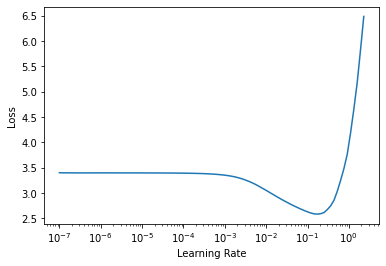

In [141]:
learn = Learner(dls, LMModel6_GRU(len(vocab),100, 50), 
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.lr_find()

In [142]:
learn.fit_one_cycle(15, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.237777,2.121003,0.330714,00:01
1,1.715323,2.027832,0.397679,00:01
2,1.449086,1.756337,0.521875,00:01
3,1.173813,1.701910,0.573750,00:01
4,0.942937,1.807148,0.602589,00:01
5,0.717533,1.591692,0.681875,00:01
6,0.529226,1.650375,0.723214,00:01
7,0.381645,1.674779,0.743482,00:01
8,0.267771,1.631491,0.749643,00:02
9,0.188362,1.843606,0.719911,00:01


## Try with the pytorch implementation

In [ ]:
nn.GRU??

In [143]:
class LMModel6_GRU_py(Module):
    def __init__(self, vocab_sz, n_hidden, n_hidden_hidden,n_layers = 2): # GRU has only 1 state, make 2 gru layers
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.GRU(n_hidden, n_hidden_hidden, n_layers, batch_first = True)
        self.h_o = nn.Linear(n_hidden_hidden, vocab_sz)
        self.h = torch.zeros(n_layers, bs, n_hidden_hidden) #for _ in range(2)] 
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = h.detach() #for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

In [144]:
learn = Learner(dls, LMModel6_GRU_py(len(vocab),100, 50), 
                loss_func=loss_func, 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.766548,2.295124,0.425089,00:01
1,2.010667,2.259489,0.315179,00:01
2,1.619095,2.442825,0.355804,00:01
3,1.246590,2.276463,0.437232,00:01
4,0.962403,1.699035,0.532054,00:01
5,0.734768,1.777398,0.548929,00:01
6,0.550805,1.815259,0.660893,00:01
7,0.409973,1.802632,0.701339,00:01
8,0.301906,1.678024,0.759018,00:01
9,0.215872,1.684758,0.772232,00:01


## Regularizing an LSTM

### Dropout

In [145]:
x = torch.empty(30)
x = x.view(-1,2)
x

tensor([[1.2037e-15, 3.0742e-41],
        [7.0065e-44, 6.8664e-44],
        [6.3058e-44, 6.7262e-44],
        [7.4269e-44, 6.3058e-44],
        [7.0065e-44, 7.2868e-44],
        [1.1771e-43, 6.8664e-44],
        [7.7071e-44, 8.1275e-44],
        [6.7262e-44, 7.0065e-44],
        [8.1275e-44, 6.8664e-44],
        [7.9874e-44, 6.4460e-44],
        [7.4269e-44, 7.0065e-44],
        [7.4269e-44, 7.4269e-44],
        [7.0065e-44, 7.5670e-44],
        [1.2612e-43, 3.0742e-41],
        [5.1283e-15, 3.0742e-41]])

In [146]:
p = 0.3

In [147]:
x.new(*x.shape)

tensor([[1.2037e-15, 3.0742e-41],
        [7.0065e-44, 6.8664e-44],
        [6.3058e-44, 6.7262e-44],
        [7.4269e-44, 6.3058e-44],
        [7.0065e-44, 7.2868e-44],
        [1.1771e-43, 6.8664e-44],
        [7.7071e-44, 8.1275e-44],
        [6.7262e-44, 7.0065e-44],
        [8.1275e-44, 7.0065e-44],
        [7.0065e-44, 6.4460e-44],
        [7.2868e-44, 6.8664e-44],
        [7.9874e-44, 7.9874e-44],
        [7.2868e-44, 6.7262e-44],
        [1.2612e-43, 3.0742e-41],
        [5.1283e-15, 3.0742e-41]])

In [148]:
mask = x.new(*x.shape).bernoulli_(1-p)
mask

tensor([[1., 1.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.]])

In [149]:
mask.div(1-p) * x

tensor([[1.7196e-15, 4.3917e-41],
        [0.0000e+00, 0.0000e+00],
        [8.9683e-44, 9.6690e-44],
        [1.0650e-43, 8.9683e-44],
        [9.9492e-44, 1.0370e-43],
        [0.0000e+00, 0.0000e+00],
        [1.1070e-43, 1.1631e-43],
        [9.6690e-44, 9.9492e-44],
        [1.1631e-43, 0.0000e+00],
        [0.0000e+00, 9.2486e-44],
        [1.0650e-43, 0.0000e+00],
        [1.0650e-43, 1.0650e-43],
        [9.9492e-44, 1.0790e-43],
        [1.8077e-43, 0.0000e+00],
        [7.3261e-15, 0.0000e+00]])

In [150]:
class Dropout(Module):
    def __init__(self, p): 
        self.p = p
    def forward(self, x):
        if not self.training: 
            return x
        mask = x.new(*x.shape).bernoulli_(1-p) 
        return x * mask.div_(1-p) # divide y thr prob

### Activation Regularization and Temporal Activation Regularization

### Training a Weight-Tied Regularized LSTM

In [151]:
class LMModel7(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers, p):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.LSTM(n_hidden, n_hidden, n_layers, batch_first=True)
        self.drop = nn.Dropout(p)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h_o.weight = self.i_h.weight
        self.h = [torch.zeros(n_layers, bs, n_hidden) for _ in range(2)]
        #self.out = 0
        
    def forward(self, x):
        raw,h = self.rnn(self.i_h(x), self.h)
        out = self.drop(raw)
        self.h = [h_.detach() for h_ in h]
        #self.out = 
        return self.h_o(out),raw,out
        # ar is applied to post dropout, ie out.
        # tar to raw 
        
    def reset(self): 
        for h in self.h: h.zero_()

The loss func cannot take all the returned values from forward as tuple. so needs modification

In [152]:
def loss_func(inputs, targ):
    # print(inp.shape, inp.view(-1, len(vocab)).shape, targ.shape, targ.view(-1).shape)
    # Input: N,C shape. C is all the possible classes 
    # target: N
    #print(inputs[0].shape,inputs[1].shape,inputs[2].shape)
    inp = inputs[0] # 0th index is the output from forward
    loss1 = nn.CrossEntropyLoss()(inp.view(-1, len(vocab)), targ.view(-1))
    loss2 = F.cross_entropy(inp.view(-1, len(vocab)), targ.view(-1))
    #print((loss1+loss2)/2.0)
    return (loss1+loss2)/2.0

In [153]:
# https://github.com/fastai/fastai/blob/master/nbs/34_callback.rnn.ipynb

In [154]:
# https://github.com/fastai/fastbook/blob/master/clean/12_nlp_dive.ipynb

In [155]:
def accuracy_new(inputs, targ, axis=-1):
    inp = inputs[0]
    pred,targ = flatten_check(inp.argmax(dim=axis), targ)
    return (pred == targ).float().mean()

In [156]:
learn = Learner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                loss_func=loss_func, metrics=accuracy_new) #, cbs=rnn_cbs(2.0,1.0))

In [157]:
learn.fit_one_cycle(15, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,accuracy_new,time
0,2.977128,2.478154,0.431964,00:01
1,2.252602,1.864439,0.455357,00:01
2,1.653930,1.644619,0.598214,00:01
3,1.105942,1.350143,0.701786,00:01
4,0.691125,1.306399,0.788571,00:01
5,0.439786,1.233159,0.778750,00:01
6,0.283793,1.146496,0.804821,00:01
7,0.190179,1.204315,0.789018,00:01
8,0.132441,1.105234,0.790625,00:01
9,0.097360,1.160680,0.797500,00:01


## With the call backs.

In [158]:
class LMModel7(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers, p):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.LSTM(n_hidden, n_hidden, n_layers, batch_first=True)
        self.drop = nn.Dropout(p)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h_o.weight = self.i_h.weight
        self.h = [torch.zeros(n_layers, bs, n_hidden) for _ in range(2)]
        #self.out = 0
        
    def forward(self, x):
        #print(x.shape)
        raw,h = self.rnn(self.i_h(x), self.h)
        out = self.drop(raw)
        self.h = [h_.detach() for h_ in h]
        self.preds = self.h_o(out)
        """
        # can also define as sub attributes to use the default callback?
        self.rnn.raw_out = raw
        self.rnn.out = out
        """
        self.raw_out = raw
        self.out = out
        return self.h_o(out),raw, out
        # ar is applied to post dropout, ie out.
        # tar to raw 
        
    def reset(self): 
        for h in self.h: h.zero_()

The loss func cannot take all the returned values from forward as tuple. so needs modification

In [159]:
del loss_func, accuracy_new

In [160]:
def loss_func(inputs, targ):
    # print(inp.shape, inp.view(-1, len(vocab)).shape, targ.shape, targ.view(-1).shape)
    # Input: N,C shape. C is all the possible classes 
    # target: N
    #print(inputs[0].shape,inputs[1].shape,inputs[2].shape)
    inp = inputs[0] # 1th index is the actual out output from forward
    loss1 = nn.CrossEntropyLoss()(inp.view(-1, len(vocab)), targ.view(-1))
    loss2 = F.cross_entropy(inp.view(-1, len(vocab)), targ.view(-1))
    #print((loss1+loss2)/2.0)
    return (loss1+loss2)/2.0

In [161]:
# https://github.com/fastai/fastai/blob/master/nbs/34_callback.rnn.ipynb

In [162]:
# https://github.com/fastai/fastbook/blob/master/clean/12_nlp_dive.ipynb

In [163]:
def accuracy_new(inputs, targ, axis=-1):
    inp = inputs[0]
    pred,targ = flatten_check(inp.argmax(dim=axis), targ)
    return (pred == targ).float().mean()

In [164]:
learn = Learner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                loss_func=loss_func, metrics=accuracy, cbs=[ModelResetter]) #, RNNRegularizer(alpha=0,beta=0)])

In [165]:
learn.fit_one_cycle(5, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time


AttributeError: ignored

Bug: learns only when alpha =0 ,beta = 0
learn = Learner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                loss_func=loss_func, metrics=accuracy_new, cbs=[ModelResetter, RNNRegularizer(alpha=0,beta=0)])

In [166]:
pip freeze | grep fastai

fastai==2.3.1


In [167]:
learn.model.rnn.out

AttributeError: ignored

So it has to store the outs. This is implemented in the fastai libs but not for the notebooks

In [168]:
class RNNRegularizer_mod(Callback):
    "Add AR and TAR regularization"
    order,run_valid = RNNCallback.order+1,False
    def __init__(self, alpha=0., beta=0.): store_attr()
    def after_loss(self):
        if not self.training: return
        if self.alpha: self.learn.loss_grad += self.alpha * self.out.float().pow(2).mean()
        if self.beta:
            h = self.raw_out
            if len(h)>1: self.learn.loss_grad += self.beta * (h[:,1:] - h[:,:-1]).float().pow(2).mean()

In [169]:
learn = Learner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                loss_func=loss_func, metrics=accuracy_new, cbs=[ModelResetter, RNNRegularizer(alpha=2,beta=1)])
learn.fit_one_cycle(15, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,accuracy_new,time


AttributeError: ignored

## Text learner automatcally calls the callbacks with default values for alpha and beta

In [170]:
class LMModel7(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers, p):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.LSTM(n_hidden, n_hidden, n_layers, batch_first=True)
        self.drop = nn.Dropout(p)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h_o.weight = self.i_h.weight
        self.h = [torch.zeros(n_layers, bs, n_hidden) for _ in range(2)]
        #self.out = 0
        
    def forward(self, x):
        #print(x.shape)
        raw,h = self.rnn(self.i_h(x), self.h)
        out = self.drop(raw)
        self.h = [h_.detach() for h_ in h]
        self.preds = self.h_o(out)
        self.raw = raw
        self.out = out
        return self.preds,self.raw, self.out
        # ar is applied to post dropout, ie out.
        # tar to raw 
        
    def reset(self): 
        for h in self.h: h.zero_()

In [171]:
learn = TextLearner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                    loss_func=CrossEntropyLossFlat(), metrics=accuracy) # cbs = rnn_cbs(2,1))

It works propery here because of RNNCallback(Callback). It takes the preds out. and makes sure accuracy and cross entropy loss works.

https://github.com/fastai/fastai/blob/master/fastai/callback/rnn.py#L37

In [172]:
learn.fit_one_cycle(15, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.976171,2.494160,0.384375,00:01
1,2.083916,1.592046,0.496518,00:01
2,1.375096,1.561060,0.551250,00:01
3,0.853347,1.103676,0.687143,00:01
4,0.516544,0.925547,0.767411,00:01
5,0.316297,0.741808,0.794464,00:01
6,0.199508,0.721819,0.813214,00:01
7,0.130819,0.771845,0.795982,00:01
8,0.092077,0.882477,0.795804,00:01
9,0.069436,0.717707,0.829107,00:01


/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (out) that exists in the learner. Use `self.learn.out` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


## Conclusion

## Questionnaire

1. If the dataset for your project is so big and complicated that working with it takes a significant amount of time, what should you do?
1. Why do we concatenate the documents in our dataset before creating a language model?
1. To use a standard fully connected network to predict the fourth word given the previous three words, what two tweaks do we need to make to ou model?
1. How can we share a weight matrix across multiple layers in PyTorch?
1. Write a module that predicts the third word given the previous two words of a sentence, without peeking.
1. What is a recurrent neural network?
1. What is "hidden state"?
1. What is the equivalent of hidden state in ` LMModel1`?
1. To maintain the state in an RNN, why is it important to pass the text to the model in order?
1. What is an "unrolled" representation of an RNN?
1. Why can maintaining the hidden state in an RNN lead to memory and performance problems? How do we fix this problem?
1. What is "BPTT"?
1. Write code to print out the first few batches of the validation set, including converting the token IDs back into English strings, as we showed for batches of IMDb data in <<chapter_nlp>>.
1. What does the `ModelResetter` callback do? Why do we need it?
1. What are the downsides of predicting just one output word for each three input words?
1. Why do we need a custom loss function for `LMModel4`?
1. Why is the training of `LMModel4` unstable?
1. In the unrolled representation, we can see that a recurrent neural network actually has many layers. So why do we need to stack RNNs to get better results?
1. Draw a representation of a stacked (multilayer) RNN.
1. Why should we get better results in an RNN if we call `detach` less often? Why might this not happen in practice with a simple RNN?
1. Why can a deep network result in very large or very small activations? Why does this matter?
1. In a computer's floating-point representation of numbers, which numbers are the most precise?
1. Why do vanishing gradients prevent training?
1. Why does it help to have two hidden states in the LSTM architecture? What is the purpose of each one?
1. What are these two states called in an LSTM?
1. What is tanh, and how is it related to sigmoid?
1. What is the purpose of this code in `LSTMCell`: `h = torch.stack([h, input], dim=1)`
1. What does `chunk` do in PyTorch?
1. Study the refactored version of `LSTMCell` carefully to ensure you understand how and why it does the same thing as the non-refactored version.
1. Why can we use a higher learning rate for `LMModel6`?
1. What are the three regularization techniques used in an AWD-LSTM model?
1. What is "dropout"?
1. Why do we scale the weights with dropout? Is this applied during training, inference, or both?
1. What is the purpose of this line from `Dropout`: `if not self.training: return x`
1. Experiment with `bernoulli_` to understand how it works.
1. How do you set your model in training mode in PyTorch? In evaluation mode?
1. Write the equation for activation regularization (in math or code, as you prefer). How is it different from weight decay?
1. Write the equation for temporal activation regularization (in math or code, as you prefer). Why wouldn't we use this for computer vision problems?
1. What is "weight tying" in a language model?

### Further Research

1. In ` LMModel2`, why can `forward` start with `h=0`? Why don't we need to say `h=torch.zeros(...)`?
1. Write the code for an LSTM from scratch (you may refer to <<lstm>>).
1. Search the internet for the GRU architecture and implement it from scratch, and try training a model. See if you can get results similar to those we saw in this chapter. Compare you results to the results of PyTorch's built in `GRU` module.
1. Take a look at the source code for AWD-LSTM in fastai, and try to map each of the lines of code to the concepts shown in this chapter.